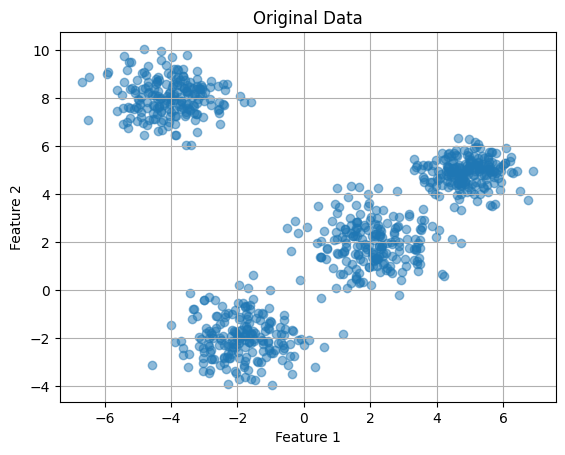

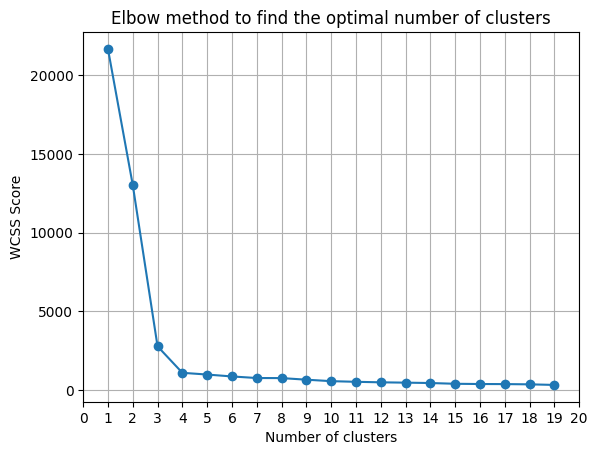

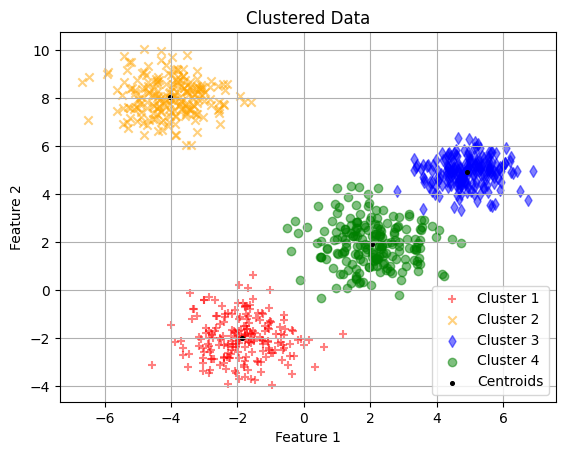

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

size = 200
np.random.seed(0)

mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]
mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]
mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

d1 = np.random.multivariate_normal(mu1, sigma1,size)
d2 = np.random.multivariate_normal(mu2,sigma2,size)
d3 = np.random.multivariate_normal(mu3, sigma3,size)
d4 = np.random.multivariate_normal(mu4,sigma4,size)

d5 = np.vstack([d1, d2, d3, d4])
# stand_data = StandardScaler().fit_transform(d5) can use the standaidzation to scale the data but the output reference is same if the data is not standardized. so we can use the original data to plot the graph

plt.scatter(d5[:,0],d5[:,1], alpha = 0.5)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()


wcss=[]
for i in range(1,20):
    kmeans = KMeans(i,random_state=0)
    kmeans.fit(d5)
    wcss.append(kmeans.inertia_)


number_clusters = range(1,20)
plt.plot(number_clusters,wcss, marker = 'o')
plt.grid()
plt.title('Elbow method to find the optimal number of clusters')
plt.xlabel('Number of clusters')
plt.xlim(0,20)
plt.xticks(np.arange(0, 21, step=1))
plt.ylabel('WCSS Score')
plt.show()


kmeans = KMeans(4, random_state=0)
kmeans_fit = kmeans.fit_predict(d5)
plt.scatter(d5[kmeans_fit == 0, 0], d5[kmeans_fit == 0, 1], marker = '+' , c = 'red', label = 'Cluster 1', alpha=0.5)
plt.scatter(d5[kmeans_fit == 1, 0], d5[kmeans_fit == 1, 1], marker = 'x', c = 'orange', label = 'Cluster 2', alpha=0.5)
plt.scatter(d5[kmeans_fit == 2, 0], d5[kmeans_fit == 2, 1], marker = 'd', c = 'blue', label = 'Cluster 3', alpha=0.5)
plt.scatter(d5[kmeans_fit == 3, 0], d5[kmeans_fit == 3, 1],  marker = 'o', c = 'green', label = 'Cluster 4', alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 7, c = 'black', label = 'Centroids')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.legend()
plt.show()